<a href="https://colab.research.google.com/github/ArtemBurenok/Stock-price-analysis-of-four-companies/blob/main/Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Purpose of analysis:
*   Build moving average of varios stocks
*   Determine correlations between stock returns
*   Create an optimal portfolio
*   Try to predict the future behavior of the stocks



In [14]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 10.9 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [15]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data
from datetime import datetime
import yfinance

In [9]:
# Setting the begining and ending
today = datetime.now()
year_ago = datetime(today.year-1, today.month, today.day)

In [10]:
# Four company for data extraction
company_list = ['TWTR', 'TSLA', 'MSFT', 'AMZN']

In [17]:
#globals()- taking the string and makes it a global variable
for company in company_list:
    globals()[company] = yfinance.download(company, year_ago, today)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [18]:
TWTR.head(5)

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2021-02-08  57.799999  59.599998  57.380001  58.200001  58.200001  18285200
2021-02-09  58.639999  60.730000  58.549999  59.869999  59.869999  38253800
2021-02-10  65.800003  69.250000  63.200001  67.769997  67.769997  73649200
2021-02-11  67.989998  69.019997  66.580002  68.559998  68.559998  30470000
2021-02-12  68.559998  73.180000  68.400002  71.900002  71.900002  38044200

In [19]:
TSLA.head(5)

Open        High  ...   Adj Close    Volume
Date                                ...                      
2021-02-08  869.669983  877.770020  ...  863.419983  20161700
2021-02-09  855.119995  859.799988  ...  849.460022  15157700
2021-02-10  843.640015  844.820007  ...  804.820007  36216100
2021-02-11  812.440002  829.880005  ...  811.659973  21622800
2021-02-12  801.260010  817.330017  ...  816.119995  23768300

[5 rows x 6 columns]

In [20]:
MSFT.head(5)

Open        High  ...   Adj Close    Volume
Date                                ...                      
2021-02-08  243.149994  243.679993  ...  240.454437  22211900
2021-02-09  241.869995  244.759995  ...  241.743622  23565000
2021-02-10  245.000000  245.919998  ...  240.801529  22186700
2021-02-11  244.779999  245.149994  ...  242.457642  15751100
2021-02-12  243.929993  245.300003  ...  242.953491  16561100

[5 rows x 6 columns]

In [21]:
AMZN.head(5)

Open         High  ...    Adj Close   Volume
Date                                 ...                      
2021-02-08  3358.50000  3365.000000  ...  3322.939941  3257400
2021-02-09  3312.48999  3338.000000  ...  3305.000000  2203500
2021-02-10  3314.00000  3317.949951  ...  3286.580078  3151600
2021-02-11  3292.00000  3292.000000  ...  3262.129883  2301400
2021-02-12  3250.00000  3280.250000  ...  3277.709961  2335300

[5 rows x 6 columns]

In [22]:
TWTR.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-02-08 to 2022-02-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       254 non-null    float64
 1   High       254 non-null    float64
 2   Low        254 non-null    float64
 3   Close      254 non-null    float64
 4   Adj Close  254 non-null    float64
 5   Volume     254 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


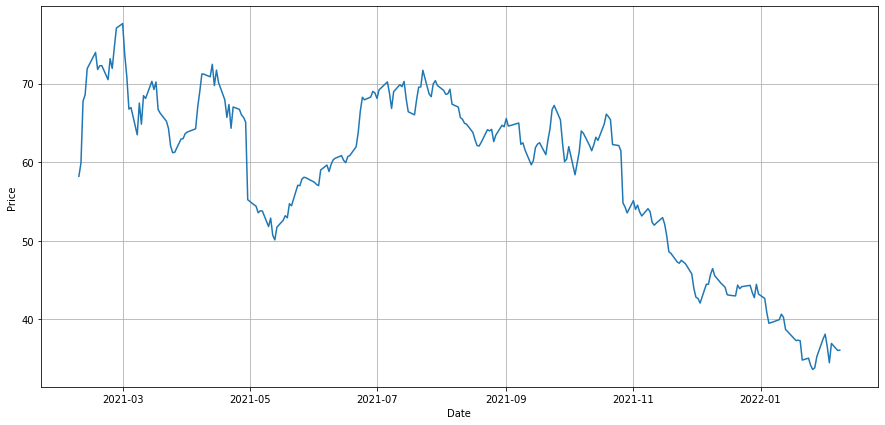

In [23]:
plt.figure(figsize=(15, 7))
plt.plot(TWTR['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()

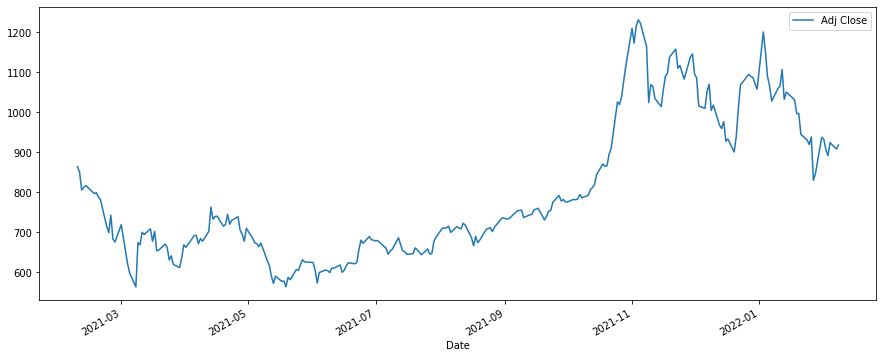

In [24]:
TSLA['Adj Close'].plot(legend=True, figsize=(15, 6))

## Moving average
Moving average - function whose value at each point is equal to some average value of the original function for the previous period.

Formula for calculations:

SUM = sum of prices for past x days; **MA = SUM / x**

In [25]:
MA_days = [10, 20, 30]

for ma in MA_days:
    ma_str = "MA: {}".format(ma)
    TWTR[ma_str] = TWTR['Adj Close'].rolling(ma).mean()
    TSLA[ma_str] = TSLA['Adj Close'].rolling(ma).mean()
    MSFT[ma_str] = MSFT['Adj Close'].rolling(ma).mean()
    AMZN[ma_str] = AMZN['Adj Close'].rolling(ma).mean()

In [26]:
TWTR.head()

Open       High        Low  ...  MA: 10  MA: 20  MA: 30
Date                                         ...                        
2021-02-08  57.799999  59.599998  57.380001  ...     NaN     NaN     NaN
2021-02-09  58.639999  60.730000  58.549999  ...     NaN     NaN     NaN
2021-02-10  65.800003  69.250000  63.200001  ...     NaN     NaN     NaN
2021-02-11  67.989998  69.019997  66.580002  ...     NaN     NaN     NaN
2021-02-12  68.559998  73.180000  68.400002  ...     NaN     NaN     NaN

[5 rows x 9 columns]

In [27]:
def plot_graphic(company, company_string):
    plt.figure(figsize=(15, 6))
    plt.plot(company['Adj Close'])
    plt.plot(company['MA: 10'])
    plt.plot(company['MA: 20'])
    plt.plot(company['MA: 30'])
    
    plt.title(company_string)
    plt.xlabel('Date')
    plt.ylabel('Price')

    plt.legend(('Adj Close','MA: 10', 'MA: 20', 'MA:30'))
    plt.grid()
    plt.show()

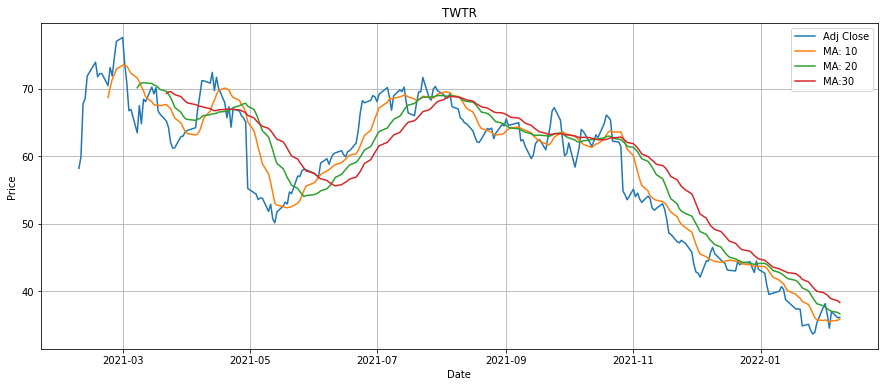

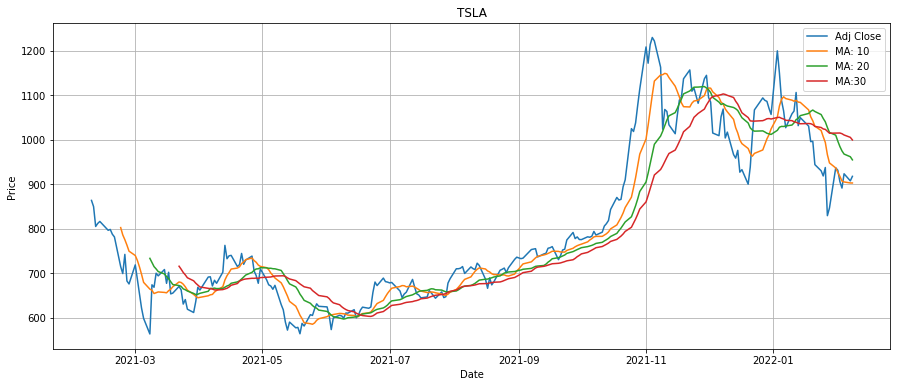

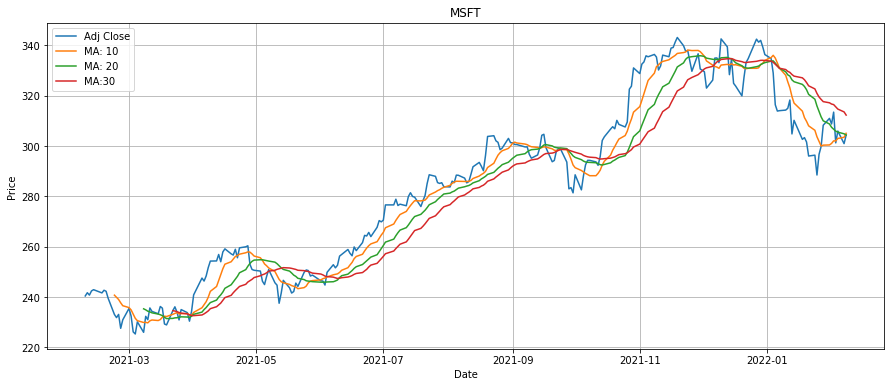

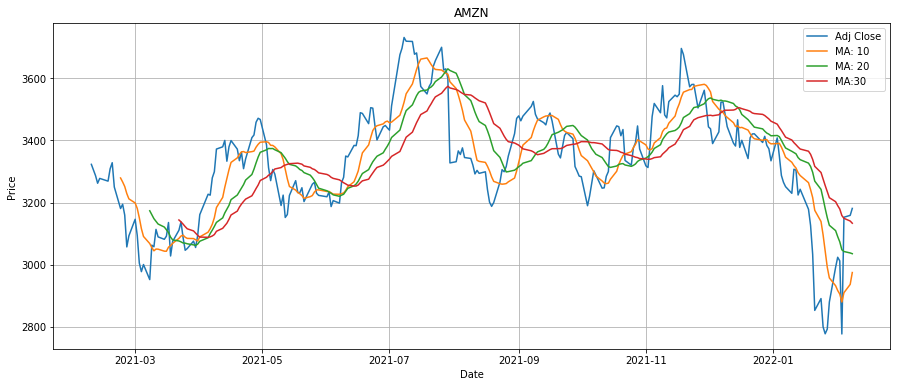

In [28]:
data_list = [TWTR, TSLA, MSFT, AMZN]

for i in range(len(data_list)):   
    plot_graphic(data_list[i], company_list[i])

If a long-term investment is being considered, then it is better to consider a smoother curve, since it is more resistant to sharp price jumps.

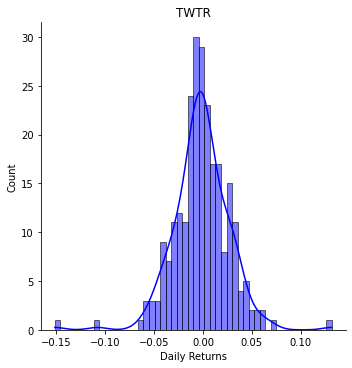

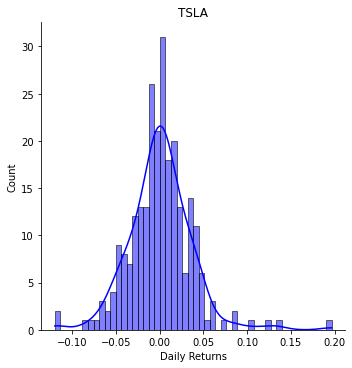

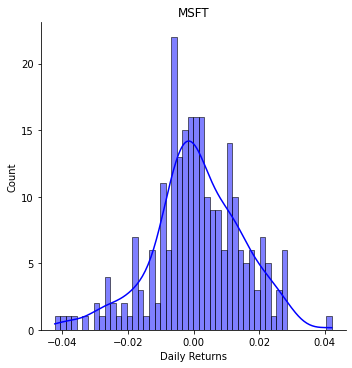

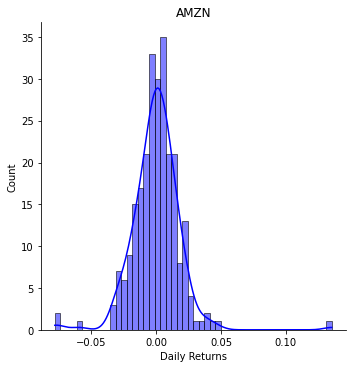

In [29]:
# Calculate returns and draw distribution

for i in range(len(data_list)):
    data_list[i]['Daily Returns'] = data_list[i]['Adj Close'].pct_change()
    sns.displot(data_list[i]['Daily Returns'].dropna(), bins=50, color='blue', kde=True)
    plt.title(company_list[i])
    plt.show()

## Correlation between stock returns

In [30]:
# Create dataframe with stock returns
stock_returns = pd.DataFrame(data=np.array([data['Daily Returns'] for data in data_list]).T, columns=company_list)
stock_returns.head()

TWTR      TSLA      MSFT      AMZN
0       NaN       NaN       NaN       NaN
1  0.028694 -0.016168  0.005361 -0.005399
2  0.131953 -0.052551 -0.003897 -0.005573
3  0.011657  0.008499  0.006878 -0.007439
4  0.048717  0.005495  0.002045  0.004776

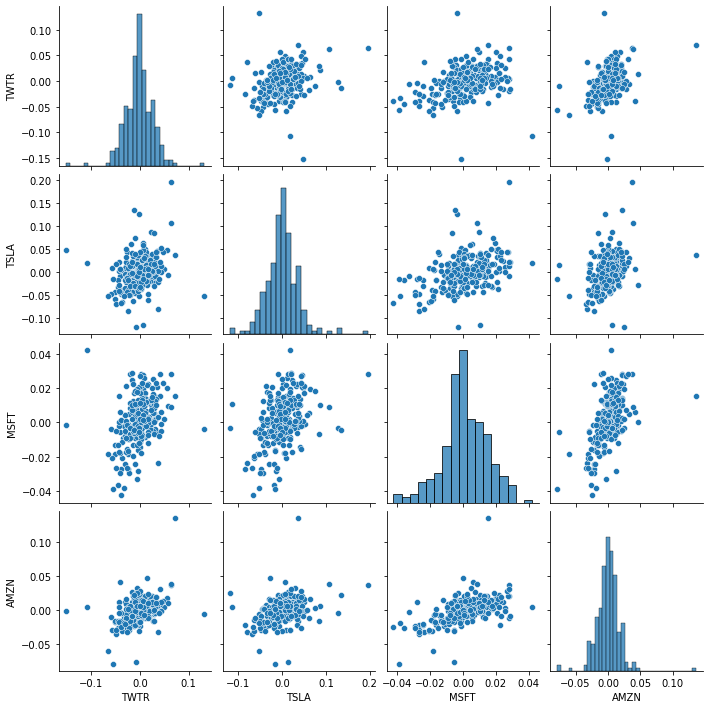

In [31]:
sns.pairplot(stock_returns.dropna())

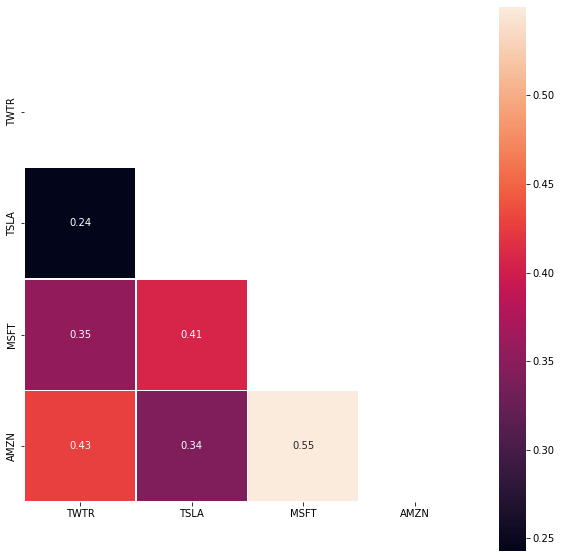

In [32]:
# Build correlation matrix
corr = stock_returns.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(corr, mask=mask,  square=True, linewidths=.5, annot=True)
plt.show()


In [33]:
def draw_jointplot(data):
    grid = sns.PairGrid(data.dropna())
    grid.map_diag(sns.histplot, bins=40, kde=True)
    grid.map_lower(sns.regplot)
    grid.map_upper(sns.kdeplot)

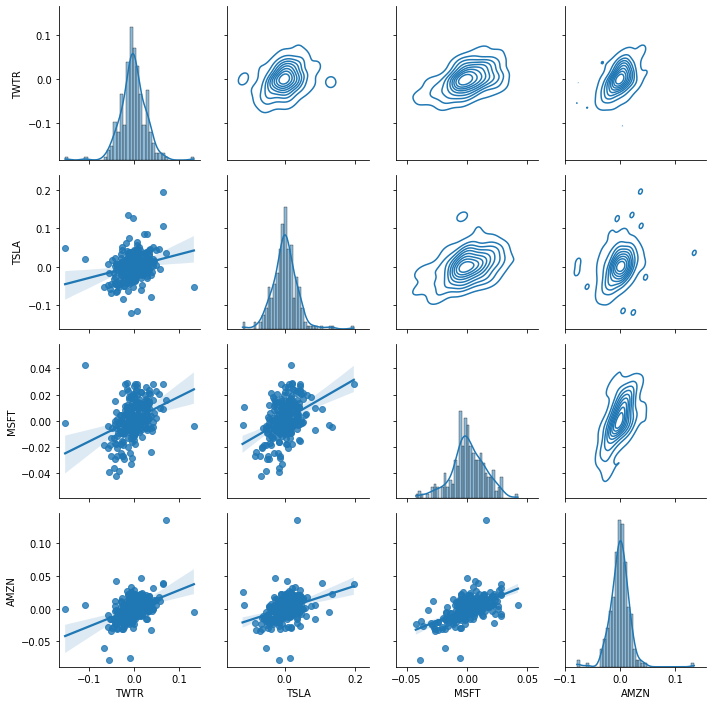

In [34]:
draw_jointplot(stock_returns)

From graphics we have see positive correlation, but it is within [0.24, 0.55]. Amazon and Microsoft have the most correlated daily profits. Tesla and Twitter have the lowest correlation.

## Portfolio strategy

Let's try to make an optimal portfolio of four stocks. Following the classical theory, it is necessary to minimize risk and maximize profitability. We will generate random ratios of stocks, calculate the risk and profitability of each portfolio according to the given formulas.

The expected return of the portfolio is the total expected return of the securities included in it, weighted taking into account their share in the portfolio.

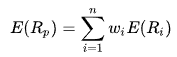

The basic formula for calculating risk is based on the relationship between the shares in the portfolio and the covariance associated with each of the securities in the portfolio.

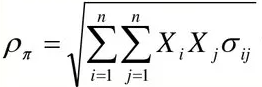

In [35]:
mean_income = stock_returns.mean() # Mean income for each stock
cov_returns = stock_returns.cov() # Covariation 
count = len(stock_returns.columns)
print(mean_income, cov_returns, sep='\n')

TWTR   -0.001486
TSLA    0.000882
MSFT    0.001025
AMZN   -0.000004
dtype: float64
          TWTR      TSLA      MSFT      AMZN
TWTR  0.000800  0.000248  0.000137  0.000223
TSLA  0.000248  0.001307  0.000202  0.000228
MSFT  0.000137  0.000202  0.000187  0.000139
AMZN  0.000223  0.000228  0.000139  0.000340


In [36]:
# Function, that generate random shares
def randomPortfolio():
    share = np.exp(np.random.randn(count))
    share = share / share.sum()
    return share

In [38]:
def IncomePortfolio(Rand):
    return np.matmul(mean_income.values, Rand)


def RiskPortfolio(Rand):
    return np.sqrt(np.matmul(np.matmul(Rand, cov_returns.values), Rand))

In [39]:
combinations = 4000
risk = np.zeros(combinations)
income = np.zeros(combinations)
portfolio = np.zeros((combinations, count))

# Function, which create new combinations of shares
for i in range(combinations):
    rand = randomPortfolio()

    portfolio[i, :] = rand
    risk[i] = RiskPortfolio(rand)
    income[i] = IncomePortfolio(rand)

The Sharpe ratio is the ratio of return to risk.

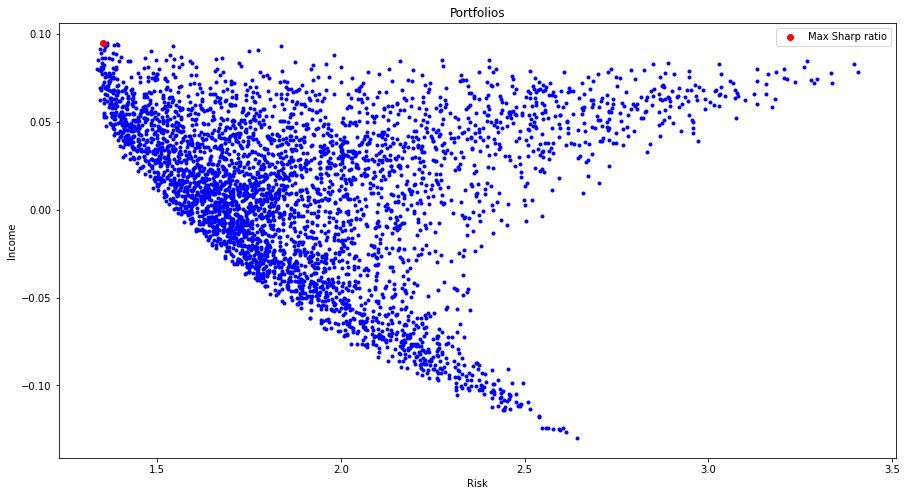

In [40]:
plt.figure(figsize=(15, 8))

plt.scatter(risk * 100, income * 100, c="b", marker=".")
plt.xlabel("Risk")
plt.ylabel("Income")
plt.title("Portfolios")
MaxSharpRatio = np.argmax(income / risk)
plt.scatter([risk[MaxSharpRatio] * 100], [income[MaxSharpRatio] * 100], c="r", marker="o", label="Max Sharp ratio")

plt.legend()
plt.show()

In [41]:
best_port = portfolio[MaxSharpRatio]
for i in range(len(company_list)):
    print("{} : {}".format(company_list[i], best_port[i]))

TWTR : 0.015855792236187896
TSLA : 0.004442253207800246
MSFT : 0.9450459097607411
AMZN : 0.034656044795270666


## Try to predict price behavior with method Monte Carlo

In [42]:
days = 365
dt = 1 / days
stock_returns.dropna(inplace=True)

mu = stock_returns.mean()
sigma = stock_returns.std()

In [43]:
def monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

### Twitter

In [44]:
TWTR.tail()

Open       High  ...     MA: 30  Daily Returns
Date                              ...                          
2022-02-02  38.290001  38.290001  ...  39.392000      -0.042235
2022-02-03  33.840000  35.180000  ...  39.062666      -0.055601
2022-02-04  35.660000  37.439999  ...  38.830666       0.071346
2022-02-07  36.720001  37.330002  ...  38.560000      -0.024364
2022-02-08  35.520000  36.139999  ...  38.285000       0.001110

[5 rows x 10 columns]

Text(0.5, 1.0, 'Monte Carlo analysis for Twitter')

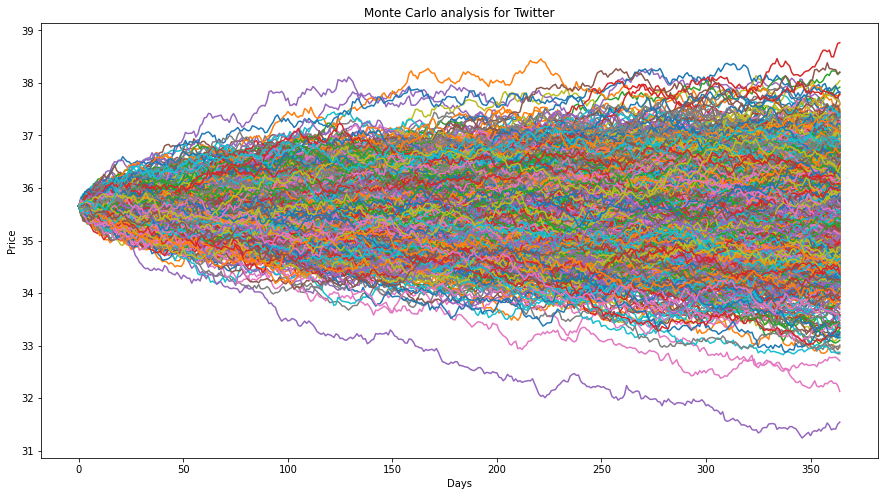

In [45]:
start_price = 35.65
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['TWTR'], sigma['TWTR'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Twitter')

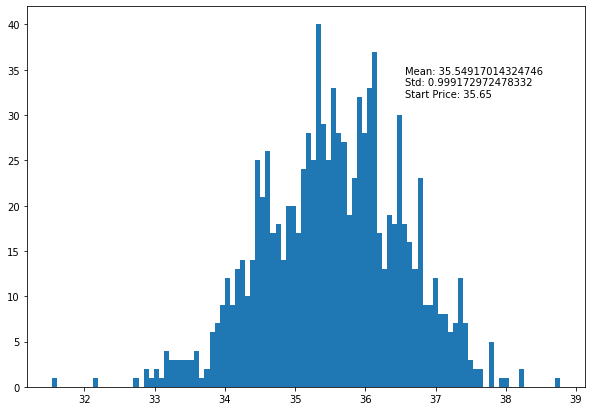

In [47]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.65, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

Start price was 35.65, mean final price is 35.54. As we can see, final price is lower then start. Although the variance is small

### Tesla

In [48]:
TSLA.tail()

Open        High  ...       MA: 30  Daily Returns
Date                                ...                            
2022-02-02  928.179993  931.500000  ...  1015.013326      -0.027479
2022-02-03  882.000000  937.000000  ...  1013.433659      -0.016032
2022-02-04  897.219971  936.500000  ...  1010.581993       0.036111
2022-02-07  923.789978  947.770020  ...  1005.259993      -0.017307
2022-02-08  905.530029  920.809998  ...   999.379663       0.011231

[5 rows x 10 columns]

Text(0.5, 1.0, 'Monte Carlo analysis for Tesla')

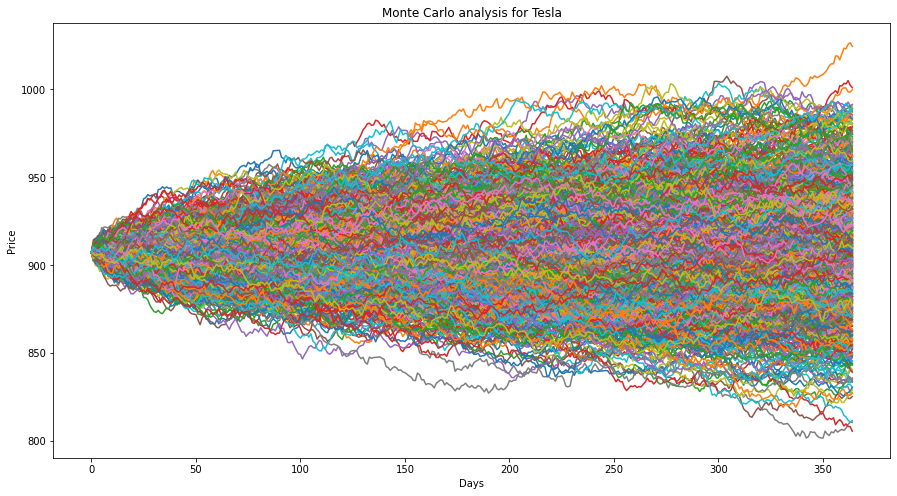

In [49]:
start_price = 907.34
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['TSLA'], sigma['TSLA'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Tesla')

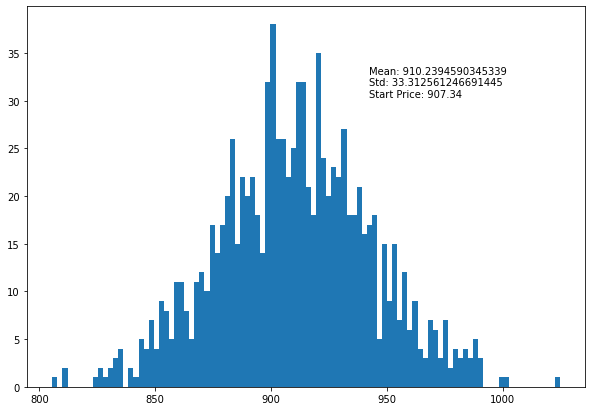

In [50]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

This time it turned out that the final price is more than the initial one. But the variance turned out to be very high. Stocks are considered risky.

### Microsoft

In [51]:
MSFT.tail()

Open        High  ...      MA: 30  Daily Returns
Date                                ...                           
2022-02-02  309.630005  315.119995  ...  316.451002       0.015222
2022-02-03  309.489990  311.230011  ...  315.583002      -0.038952
2022-02-04  300.209991  308.799988  ...  314.674335       0.015568
2022-02-07  306.170013  307.839996  ...  313.549668      -0.016310
2022-02-08  301.250000  305.124207  ...  312.280001       0.011331

[5 rows x 10 columns]

Text(0.5, 1.0, 'Monte Carlo analysis for Microsoft')

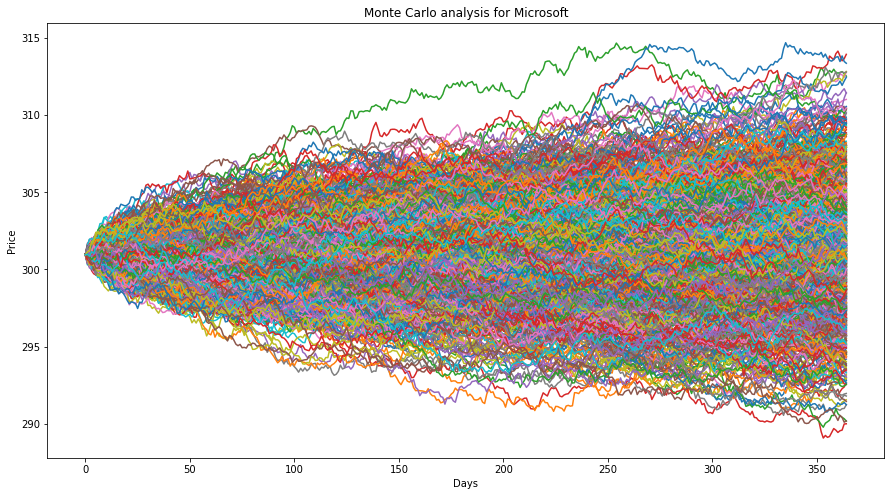

In [52]:
start_price = 300.95
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['MSFT'], sigma['MSFT'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Microsoft')

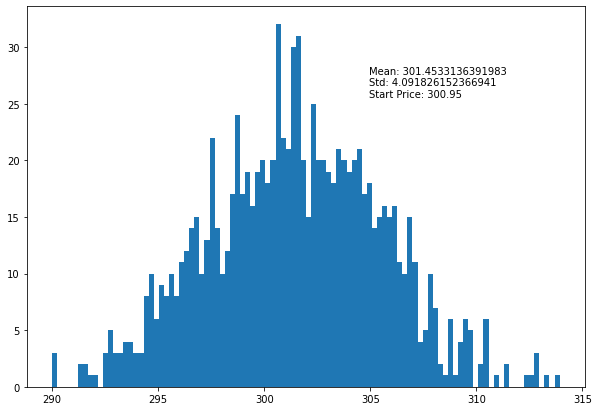

In [53]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()


The stock looks stable. The final price is more than the initial one. The variance is relatively small

### Amazon

In [54]:
AMZN.tail()

Open         High  ...       MA: 30  Daily Returns
Date                                  ...                            
2022-02-02  3101.010010  3101.500000  ...  3179.225675      -0.003843
2022-02-03  2834.750000  2884.949951  ...  3158.178003      -0.078128
2022-02-04  3112.129883  3224.000000  ...  3149.246338       0.135359
2022-02-07  3170.399902  3253.820068  ...  3140.490999       0.001878
2022-02-08  3135.010010  3186.260010  ...  3133.415999       0.007101

[5 rows x 10 columns]

Text(0.5, 1.0, 'Monte Carlo analysis for Amazon')

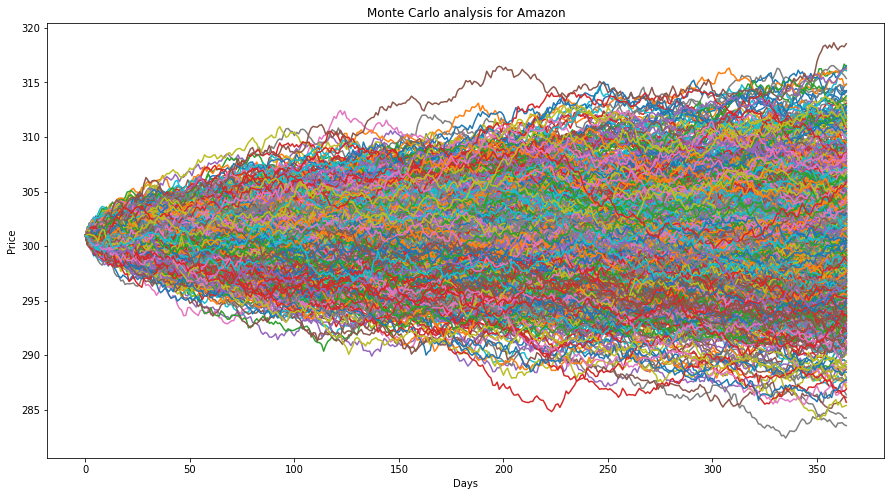

In [55]:
start_price = 300.95
sim = np.zeros(1000)

plt.figure(figsize=(15, 8))
for i in range(1000):
    result = monte_carlo(start_price, days, mu['AMZN'], sigma['AMZN'])
    sim[i] = result[days - 1]
    plt.plot(result)
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo analysis for Amazon')

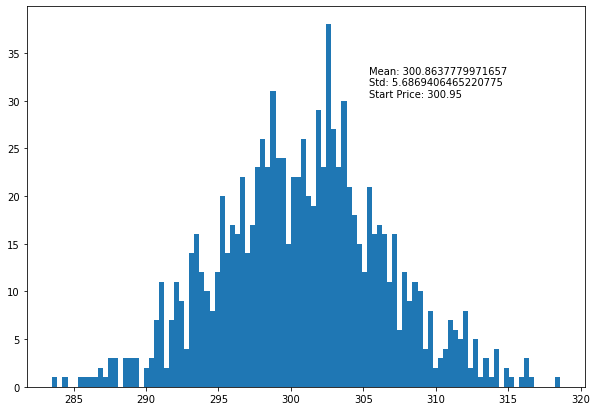

In [56]:
plt.figure(figsize=(10, 7))
plt.hist(sim, bins=100)
plt.figtext(0.6, 0.7, "Mean: {} \nStd: {} \nStart Price: {}".format(sim.mean(), sim.std(), start_price))
plt.show()

The initial and final price are almost the same. The variance is normal. Stocks look stable.